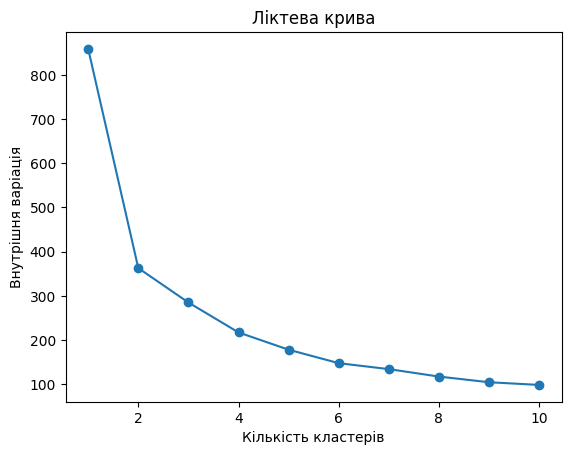

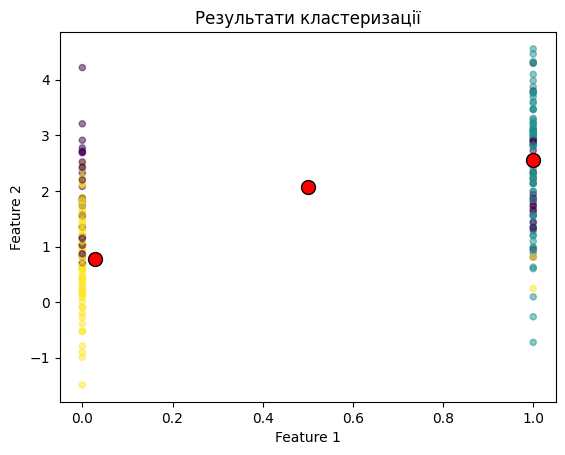

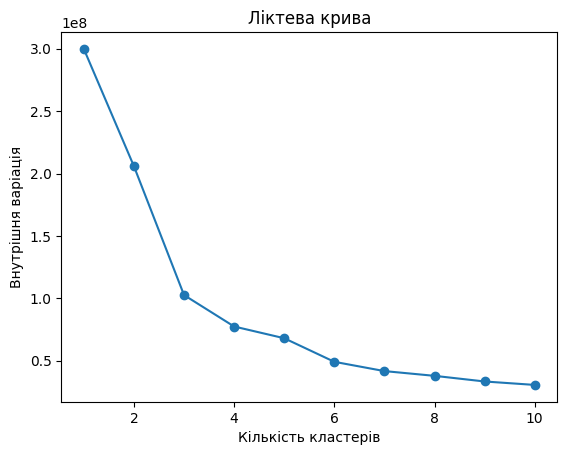

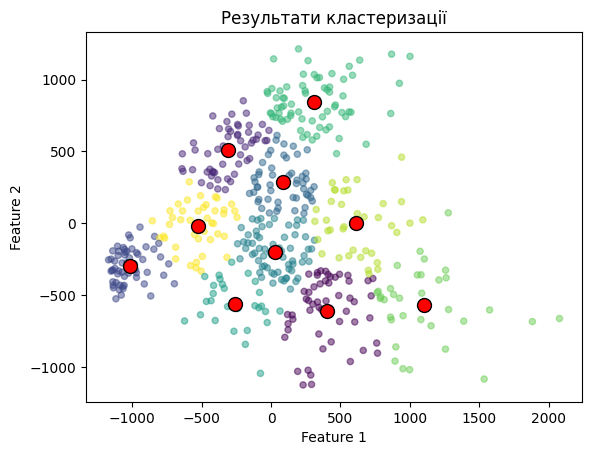

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Завантаження даних
file_path1 = "D:/PythonProjects/MY_PYTHON_WAY/PYTHON_DATA-SCIENS/HomeWork_6/data/data/data_2d.csv"
file_path2 = "D:/PythonProjects/MY_PYTHON_WAY/PYTHON_DATA-SCIENS/HomeWork_6/data/data/mnist.csv"
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Функція для відображення ліктевої кривої
def plot_elbow_curve(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Внутрішня варіація')
    plt.title('Ліктева крива')
    plt.show()

# Функція для візуалізації результатів кластеризації
def plot_clusters(data, labels, centroids=None):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=20, alpha=0.5)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=100, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Результати кластеризації')
    plt.show()

# Застосування K-means та відображення ліктевої кривої для першого датасету
plot_elbow_curve(df1)

# Вибір оптимальної кількості кластерів для першого датасету (за ліктевим методом)
optimal_clusters_df1 = 3  # Встановлюємо оптимальну кількість кластерів

# Навчання моделі K-means з оптимальною кількістю кластерів для першого датасету
kmeans_df1 = KMeans(n_clusters=optimal_clusters_df1, random_state=42)
kmeans_df1.fit(df1)
labels_df1 = kmeans_df1.labels_

# Відображення результатів кластеризації для першого датасету
plot_clusters(df1.values, labels_df1, centroids=kmeans_df1.cluster_centers_)

# Застосування PCA для зменшення розмірності даних MNIST до 2D
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(df2)

# Застосування K-means та відображення ліктевої кривої для другого датасету (за ліктевим методом)
plot_elbow_curve(mnist_2d)

# Вибір оптимальної кількості кластерів для другого датасету (за ліктевим методом)
optimal_clusters_df2 = 10  # Встановлюємо оптимальну кількість кластерів

# Навчання моделі K-means з оптимальною кількістю кластерів для другого датасету
kmeans_df2 = KMeans(n_clusters=optimal_clusters_df2, random_state=42)
kmeans_df2.fit(mnist_2d)
labels_df2 = kmeans_df2.labels_

# Відображення результатів кластеризації для другого датасету
plot_clusters(mnist_2d, labels_df2, centroids=kmeans_df2.cluster_centers_)

